<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* pandas functions
* np dt
* regression 
* json

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import datetime, time, date, timezone, timedelta

# pandas functions

In [3]:
list_file = [f'players_{a:02d}.csv' for a in range(15,19)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [4]:
top_nans = pd.DataFrame(d1.isnull().sum()[d1.isnull().sum() != 0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
loaned_from,59451
nation_position,59429
nation_jersey_number,59429


In [16]:
d1[top_nans.index].fillna(d1.mode().iloc[0,0]).head()

,loaned_from,nation_position,nation_jersey_number
0,28.0,CF,10.0
1,28.0,LW,7.0
2,28.0,RS,11.0
3,28.0,ST,10.0
4,28.0,GK,1.0


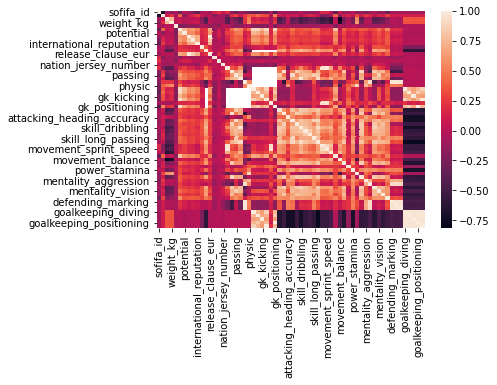

In [17]:
sns.heatmap(d1.corr())

In [21]:
d2 = pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'staet':'category'})
d2.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [22]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     object        
 2   permit  19 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.0+ bytes


In [28]:
s1 = pd.pivot_table(d2, index = 'state', columns = 'month', values='permit')
s1

month,2020-01-31,2020-02-29,2020-03-31,2020-04-30
state,,,,
Alabama,37140.0,29633.0,31205.0,21276.0
Alaska,223.0,139.0,143.0,85.0
California,34694.0,32002.0,27792.0,24460.0
Massachusetts,9289.0,9173.0,NaN,5074.0
North Dakota,370.0,396.0,587.0,280.0


In [29]:
s1.columns = s1.columns.astype('str')
s1 = s1.reset_index()
s1

month,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [30]:
s1.columns.name = None
s1

,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [31]:
s2 = pd.melt(s1, id_vars = 'state', var_name = 'month', value_name = 'permit')
s2.head()

,state,month,permit
0,Alabama,2020-01-31,37140.0
1,Alaska,2020-01-31,223.0
2,California,2020-01-31,34694.0
3,Massachusetts,2020-01-31,9289.0
4,North Dakota,2020-01-31,370.0


In [36]:
s2 = s2[d2.columns]
s2.head()

,month,state,permit
0,2020-01-31,Alabama,37140.0
1,2020-01-31,Alaska,223.0
2,2020-01-31,California,34694.0
3,2020-01-31,Massachusetts,9289.0
4,2020-01-31,North Dakota,370.0


In [37]:
s2.month.to_numpy().astype('datetime64[D]')

array(['2020-01-31', '2020-01-31', '2020-01-31', '2020-01-31',
       '2020-01-31', '2020-02-29', '2020-02-29', '2020-02-29',
       '2020-02-29', '2020-02-29', '2020-03-31', '2020-03-31',
       '2020-03-31', '2020-03-31', '2020-03-31', '2020-04-30',
       '2020-04-30', '2020-04-30', '2020-04-30', '2020-04-30'],
      dtype='datetime64[D]')

# np dt

In [38]:
d3  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d3.purchase_date = pd.to_datetime(d3.purchase_date)
d3

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [47]:
d3.assign(month1 = d3.purchase_date.to_numpy().astype('datetime64[M]'),
          month2 = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin(1),
          month3 = d3.purchase_date.dt.to_period('M').dt.to_timestamp()
          )

,user_id,purchase_date,month1,month2,month3
0,1,2015-01-23 14:05:21,2015-01-01,2015-01-01,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-01,2015-02-01,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-01,2015-02-01,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-01,2015-03-01,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-01,2015-03-01,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-01,2015-03-01,2015-03-01


In [49]:
x = np.random.randint(1, 100, 200)
cond = [x >= 90, x>= 50, x>= 0]
labs = list('ABC')
pd.DataFrame({'score' : x , 'grade' : np.select(cond, labs)}).head()

,score,grade
0,61,B
1,60,B
2,96,A
3,14,C
4,29,C


# regression

In [51]:
!pip install sklearn

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import sklearn.datasets as skd
import matplotlib.pyplot as plt

In [55]:
a1 = pd.read_csv('heights.csv')
a2 = pd.read_csv('manhattan.csv')

In [57]:
x = a1.height.values.reshape(-1, 1)
y = a1.weight

In [58]:
fit_lm = LinearRegression().fit(x, y)

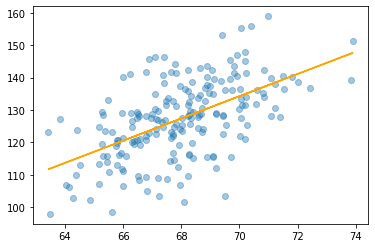

In [60]:
plt.plot(x, y, 'o', alpha = .4)
plt.plot(x, fit_lm.predict(x), 'orange')

In [63]:
x = a2[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio']]
y = a2['rent']


x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [64]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

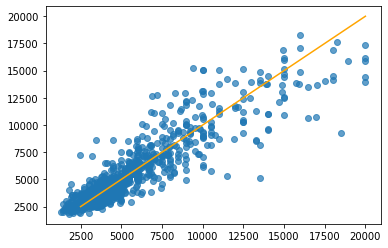

In [66]:
plt.plot(y_te, pred_rf, 'o', alpha = .7)
plt.plot([2500,20000], [2500,20000], color = 'orange')

In [72]:
raw = skd.load_breast_cancer()
[a for a, b in raw.items()]

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [73]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [74]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [77]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [82]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

In [86]:
fit_rf.score(x_te, y_te)

0.9649122807017544

# json

In [91]:
import json
import os
import string

In [88]:
os.getcwd()

'/content'

In [89]:
data = {}
data['raw'] = []

In [97]:
l1 = list(string.ascii_lowercase)

In [105]:
name = [''.join(np.random.choice(l1, 10, replace = True)).title() for a in range(30)]
age = np.random.randint(1,100, 30).tolist()
add = [''.join(np.random.choice(l1, np.random.randint(3,7, 1), replace = True)).title() for a in range(30)]

In [109]:
temp = [{'name':a,'age':b,'address':c} for a,b,c in zip(name,age,add)]

In [111]:
for a in range(len(temp)) :
  data['raw'].append(temp[a])

In [112]:
data

{'raw': [{'address': 'Wkxe', 'age': 53, 'name': 'Bpfonnvowu'},
  {'address': 'Dlusxh', 'age': 51, 'name': 'Gepjbuhmbt'},
  {'address': 'Zxq', 'age': 10, 'name': 'Ffkzioapdu'},
  {'address': 'Ydqem', 'age': 96, 'name': 'Uqxqkaqzmu'},
  {'address': 'Bduupp', 'age': 85, 'name': 'Rkoegjegxr'},
  {'address': 'Kva', 'age': 24, 'name': 'Vttnrfbtjd'},
  {'address': 'Xzup', 'age': 95, 'name': 'Waeshvjqkl'},
  {'address': 'Xafn', 'age': 59, 'name': 'Kvcdvvghvs'},
  {'address': 'Wevd', 'age': 70, 'name': 'Zhgirebfwv'},
  {'address': 'Oyugyw', 'age': 95, 'name': 'Hxsxrmnunb'},
  {'address': 'Wmb', 'age': 90, 'name': 'Mjeanxmpvo'},
  {'address': 'Pdf', 'age': 90, 'name': 'Sdrfkbkiad'},
  {'address': 'Wfc', 'age': 31, 'name': 'Yriznxnslo'},
  {'address': 'Naq', 'age': 46, 'name': 'Ziefaudzgk'},
  {'address': 'Kwny', 'age': 62, 'name': 'Qwvtftxplw'},
  {'address': 'Ikrmw', 'age': 55, 'name': 'Aikshlbbfm'},
  {'address': 'Oguiwi', 'age': 80, 'name': 'Nzcwvjjfoy'},
  {'address': 'Tmq', 'age': 86, 'name

In [118]:
with open('test.json', 'w') as f :
  json.dump(data, f, indent = 4)

In [120]:
with open('test.json', 'r') as f :
  df = json.load(f)
pd.json_normalize(df['raw']).head()

,name,age,address
0,Bpfonnvowu,53,Wkxe
1,Gepjbuhmbt,51,Dlusxh
2,Ffkzioapdu,10,Zxq
3,Uqxqkaqzmu,96,Ydqem
4,Rkoegjegxr,85,Bduupp
